# GRIP Task 2 - Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters and
represent it visually. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [3]:
#load the data set
iris_data=datasets.load_iris()

iris=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris.head()
iris.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data preprocessing

In [4]:
#normalization function
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x


In [4]:
#normalize the numerical data
df_norm=norm_fun(iris.iloc[:,1:5])
df_norm


,sepal width (cm),petal length (cm),petal width (cm)
0,0.625000,0.067797,0.041667
1,0.416667,0.067797,0.041667
2,0.500000,0.050847,0.041667
3,0.458333,0.084746,0.041667
4,0.666667,0.067797,0.041667
...,...,...,...
145,0.416667,0.711864,0.916667
146,0.208333,0.677966,0.750000
147,0.416667,0.711864,0.791667
148,0.583333,0.745763,0.916667


In [5]:
y=iris.iloc[:, [0, 1, 2]].values

Screeplot to find the appropriate k value

In [6]:
#scree plot or elbow curve
TWSS=[]
k=list(range(2,11))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(y)
    TWSS.append(kmeans.inertia_)
TWSS

[133.46431822602608,
 69.42973924466338,
 49.437815584415574,
 40.325266666666685,
 33.017118381618396,
 29.10571151887328,
 25.381807359307366,
 23.21379984051037,
 21.642173217133738]

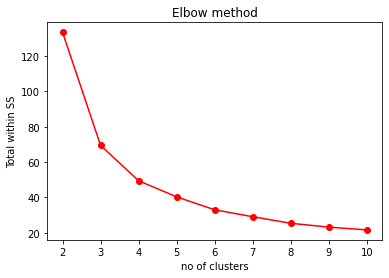

In [7]:
#elbow curve 
plt.plot(k,TWSS,'ro-');plt.title("Elbow method");plt.xlabel('no of clusters');plt.ylabel('Total within SS')   
plt.show()

In [8]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(y)



Visualize the clusters

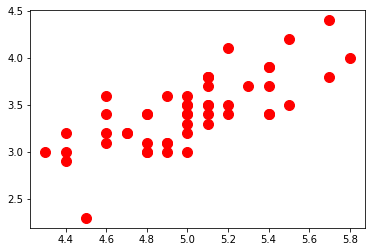

In [9]:

#visualizing clusters
plt.scatter(y[y_kmeans == 0, 0], y[y_kmeans== 0, 1],s = 100,c='red', label = 'Iris-setosa')

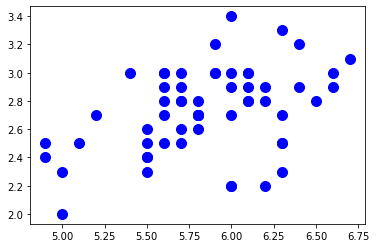

In [10]:
plt.scatter(y[y_kmeans == 1, 0], y[y_kmeans == 1, 1],s = 100,c = 'blue', label = 'Iris-versicolour')


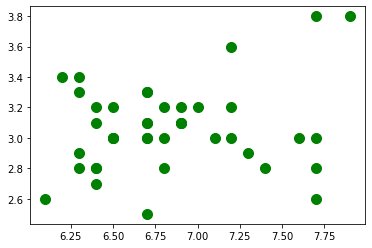

In [13]:
plt.scatter(y[y_kmeans== 2, 0], y[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')




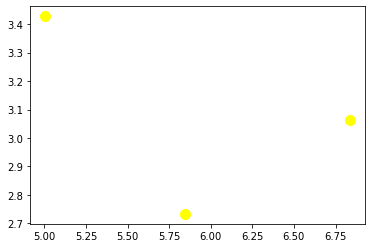

In [11]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')


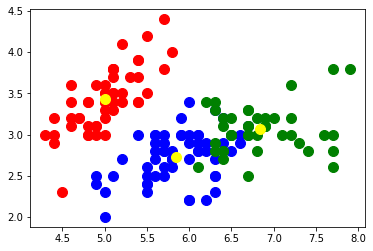

In [15]:
#visualizing clusters
plt.scatter(y[y_kmeans == 0, 0], y[y_kmeans== 0, 1],s = 100,c='red', label = 'Iris-setosa')
plt.scatter(y[y_kmeans == 1, 0], y[y_kmeans == 1, 1],s = 100,c = 'blue', label = 'Iris-versicolour')
plt.scatter(y[y_kmeans== 2, 0], y[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')


The optimum number of cluters for the iris data set is 3.